# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.


$\nabla Q(w) = -\frac{2}{\ell} X^T (y - Xw)$


### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [ ]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [ ]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [ ]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/70588/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/70588/run-report/124600832/


* **StochasticDescent**: https://contest.yandex.ru/contest/70588/run-report/124600839/


* **MomentumDescent**: https://contest.yandex.ru/contest/70588/run-report/124600851/


* **Adam**: https://contest.yandex.ru/contest/70588/run-report/124600853/


* **LinearRegression**: https://contest.yandex.ru/contest/70588/run-report/124600924/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [ ]:
data = pd.read_csv('autos.csv')

In [ ]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

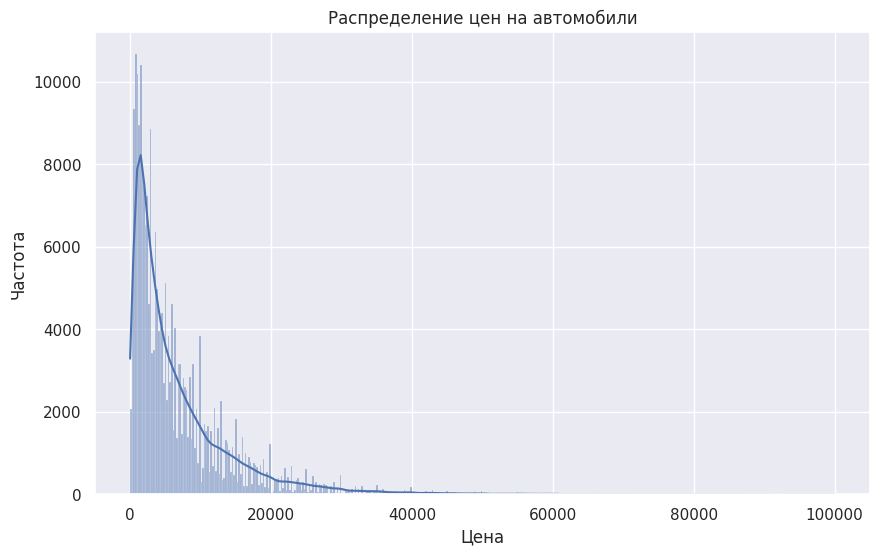

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['price'], kde=True)
plt.title('Распределение цен на автомобили')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

In [ ]:
data = data[(data['price'] > 150) & (data['price'] < 50000)]

In [ ]:
data['log_price'] = data['price'].apply(lambda x: np.log(x) if x > 0 else 0)

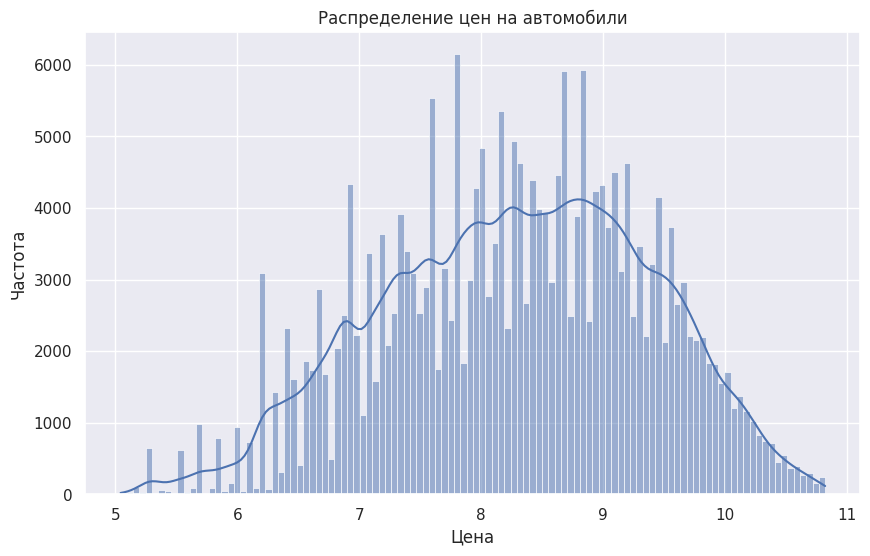

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['log_price'], kde=True)
plt.title('Распределение цен на автомобили')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

По графикам можно сделать вывод, что лучше исследовать log, так как он болле нормально распределен.

In [ ]:
data.dtypes

,0
brand,object
model,object
vehicleType,object
gearbox,int64
fuelType,object
notRepairedDamage,int64
powerPS,int64
kilometer,int64
autoAgeMonths,int64
price,int64


Cудя по этому выводу, 'powerPS', 'autoAgeMonths', 'kilometer' - числовые признаки, остальные - категориальные.

Также по графикам ниже видно, что 'notRepairedDamage', 'gearbox' - биномиальные признаки и поэтому просто переведем эти значения в 0/1.

In [ ]:
data['notRepairedDamage'] = data['notRepairedDamage'].map({'ja': 1, 'nein': 0})
data['gearbox'] = data['gearbox'].map({'manuell': 1, 'automatik': 0})

In [ ]:
categorical = ['brand', 'vehicleType', 'fuelType', 'model']
numeric = ['powerPS', 'autoAgeMonths', 'kilometer']
other = ['notRepairedDamage', 'gearbox']

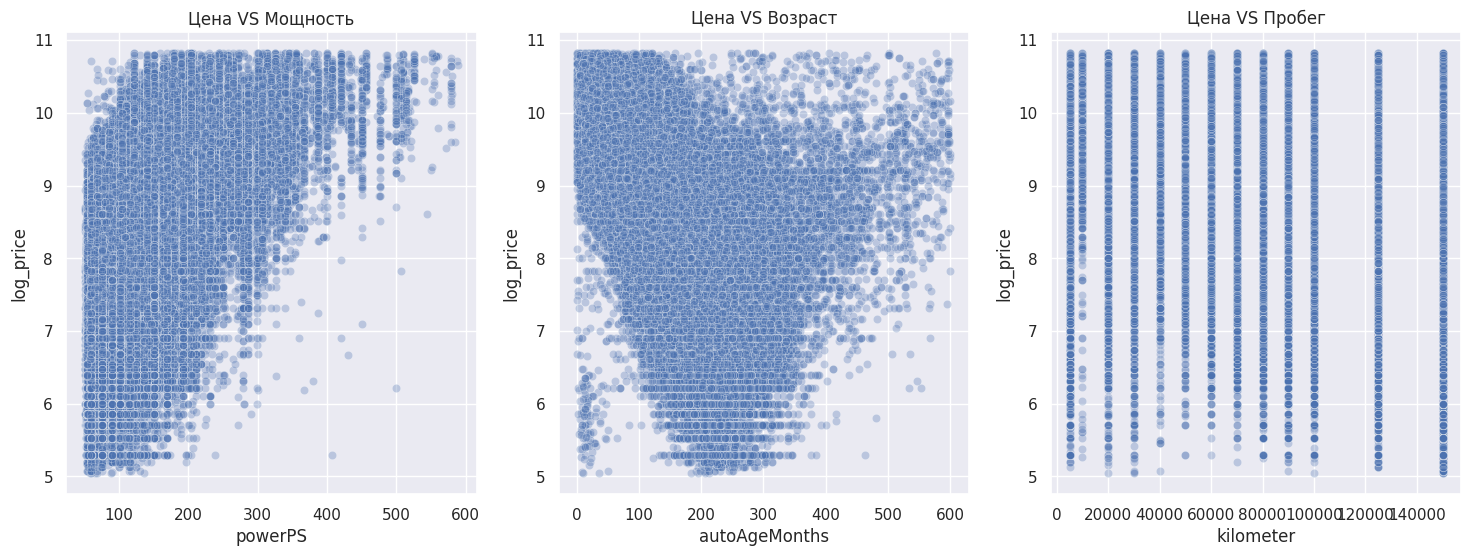

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=data, x='powerPS', y='log_price', alpha=0.3, ax=axs[0])
axs[0].set_title('Цена VS Мощность')

sns.scatterplot(data=data, x='autoAgeMonths', y='log_price', alpha=0.3, ax=axs[1])
axs[1].set_title('Цена VS Возраст')

sns.scatterplot(data=data, x='kilometer', y='log_price', alpha=0.3, ax=axs[2])
axs[2].set_title('Цена VS Пробег')

plt.show()

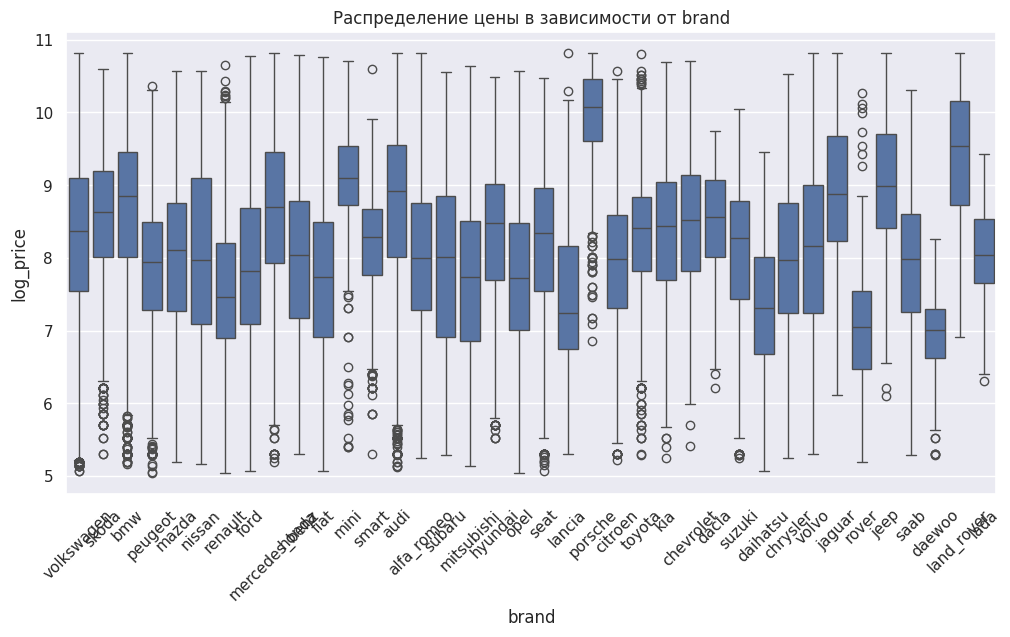

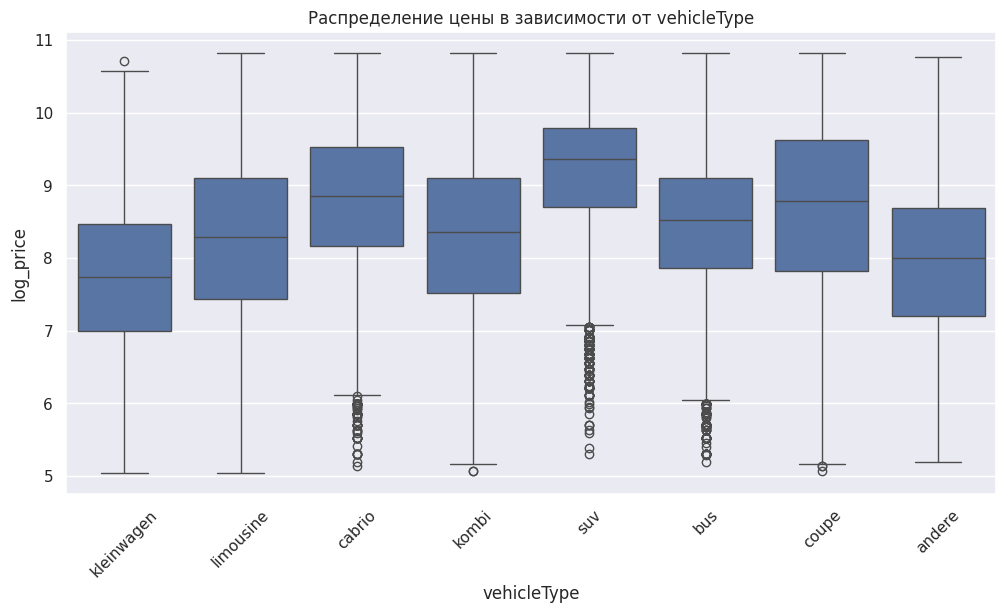

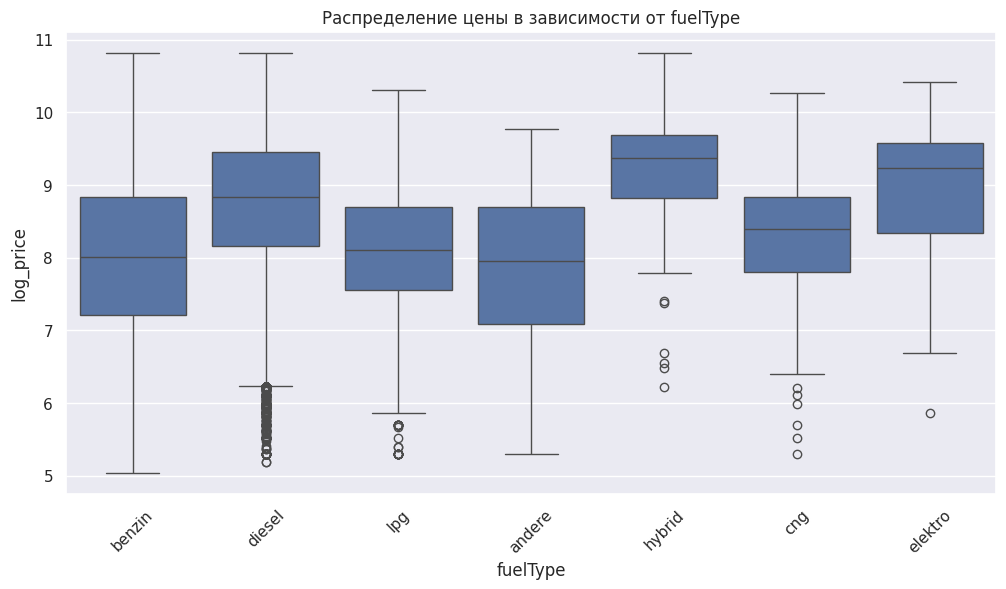

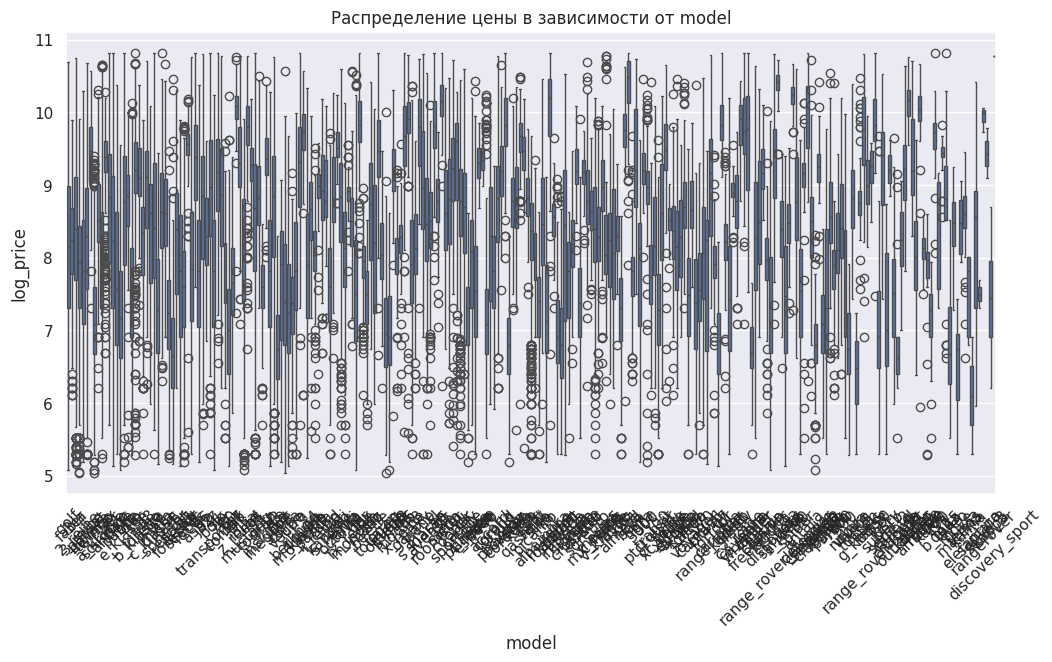

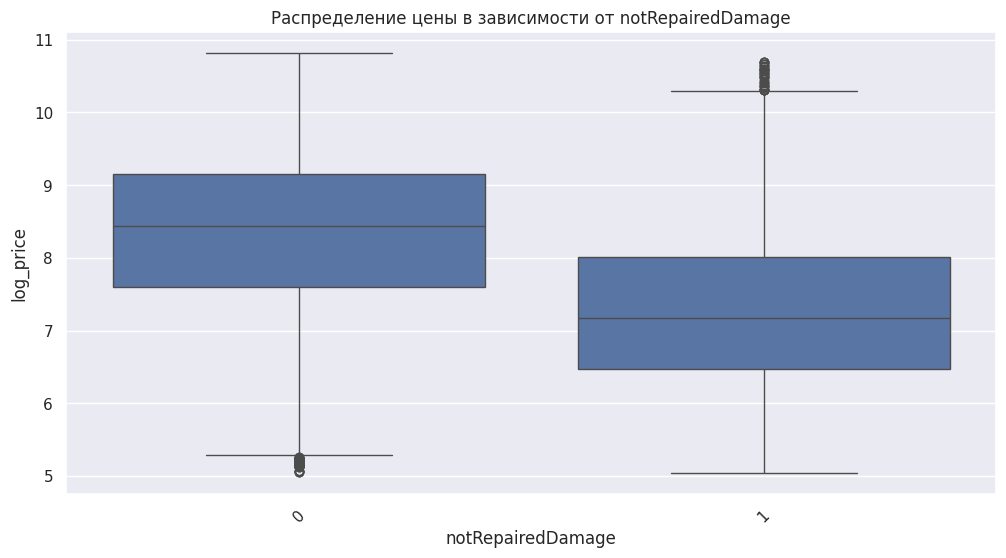

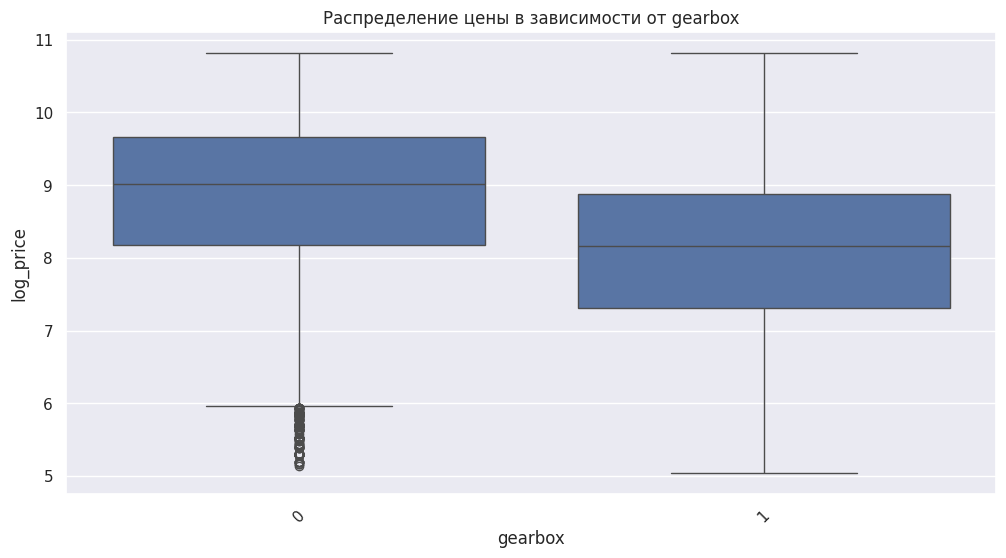

In [ ]:
for feature in categorical + other:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x=feature, y='log_price')
    plt.title(f'Распределение цены в зависимости от {feature}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

Применим к числовым - StandardScaler, а к категориальным - OneHotEncoder.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split(x.toarray(), y.values, test_size=0.2, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

lambda_grid = np.logspace(-5, 0, 10)
results = {}
methods = ['full', 'stochastic', 'momentum', 'adam']
for method in methods:
    print(f"Метод: {method}")

    results[method] = {
        'best_lambda': None,
        'best_r2': -np.inf,
        'train_errors': [],
        'val_errors': [],
        'iterations': [],
        'train_errors_iter': []
    }

    for lambda_ in lambda_grid:
        descent_config = {
            'descent_name': method,
            'kwargs': {'dimension': x_train.shape[1], 'lambda_': lambda_}
        }

        model = LinearRegression(descent_config=descent_config)
        model.fit(x_train, y_train)
        y_train_pred = model.predict(x_train)
        y_val_pred = model.predict(x_val)
        train_error = np.mean((y_train - y_train_pred) ** 2)
        val_error = np.mean((y_val - y_val_pred) ** 2)
        r2_val = r2_score(y_val, y_val_pred)

        results[method]['train_errors'].append(train_error)
        results[method]['val_errors'].append(val_error)
        results[method]['iterations'].append(len(model.loss_history))
        results[method]['train_errors_iter'].append(model.loss_history)

        if r2_val > results[method]['best_r2']:
            results[method]['best_r2'] = r2_val
            results[method]['best_lambda'] = lambda_

    print(f"Лучшее значение lambda для {method}: {results[method]['best_lambda']}")
    print(f"R2 на валидационной выборке для {method}: {results[method]['best_r2']}")
    print("----")

Метод: full
Лучшее значение lambda для full: 1.0
R2 на валидационной выборке для full: 0.7042066666592496
----
Метод: stochastic
Лучшее значение lambda для stochastic: 0.2782559402207126
R2 на валидационной выборке для stochastic: 0.571356094688199
----
Метод: momentum
Лучшее значение lambda для momentum: 1.0
R2 на валидационной выборке для momentum: 0.7808866812104761
----
Метод: adam
Лучшее значение lambda для adam: 1.0
R2 на валидационной выборке для adam: 0.795393427669977
----


### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

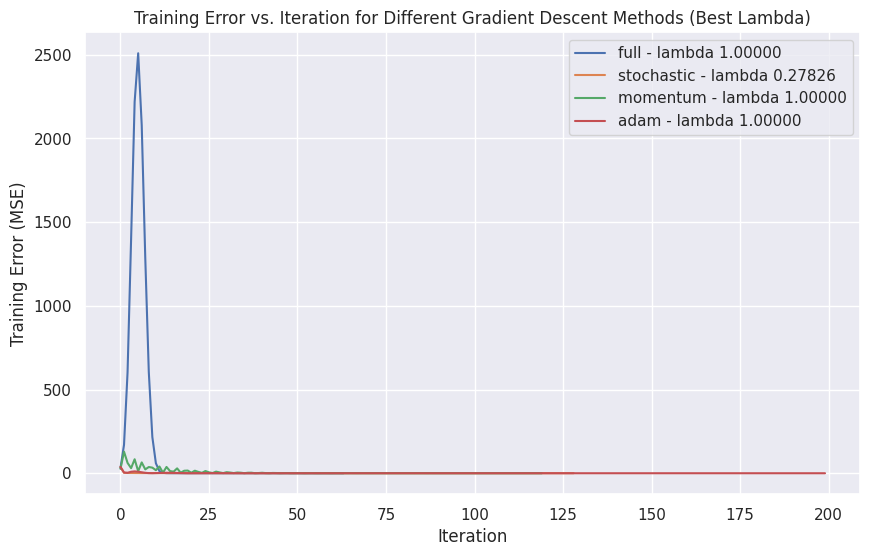

In [ ]:
plt.figure(figsize=(10, 6))

for method in methods:
    best_lambda = results[method]['best_lambda']
    lambda_index = np.where(lambda_grid == best_lambda)[0][0]
    error_iter = results[method]['train_errors_iter'][lambda_index]
    plt.plot(range(len(error_iter)), error_iter, label=f'{method} - lambda {best_lambda:.5f}')

plt.xlabel('Iteration')
plt.ylabel('Training Error (MSE)')
plt.title('Training Error vs. Iteration for Different Gradient Descent Methods (Best Lambda)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

for method in methods:
    print(f"Метод: {method}")
    print(f"Лучшее значение lambda: {results[method]['best_lambda']}")
    print(f"R2 на валидационной выборке: {results[method]['best_r2']}")
    print(f"Количество итераций до сходимости: {results[method]['iterations'][-1]}")
    print("----")

•	Сходимость: Full и Momentum достигают низких значений ошибки за меньшее количество итераций по сравнению с Stochastic, что дает им приумущество.

•	Качество: Adam имеет наивысший R² на валидации и хорошее поведение по снижению ошибки, хотя требуется больше итераций для сходимости, чем у Full и Momentum. Stochastic имеет наименьшую ошибку при оптимальной лямбде, что также выделяет среди остальных методов в положительном ключе.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

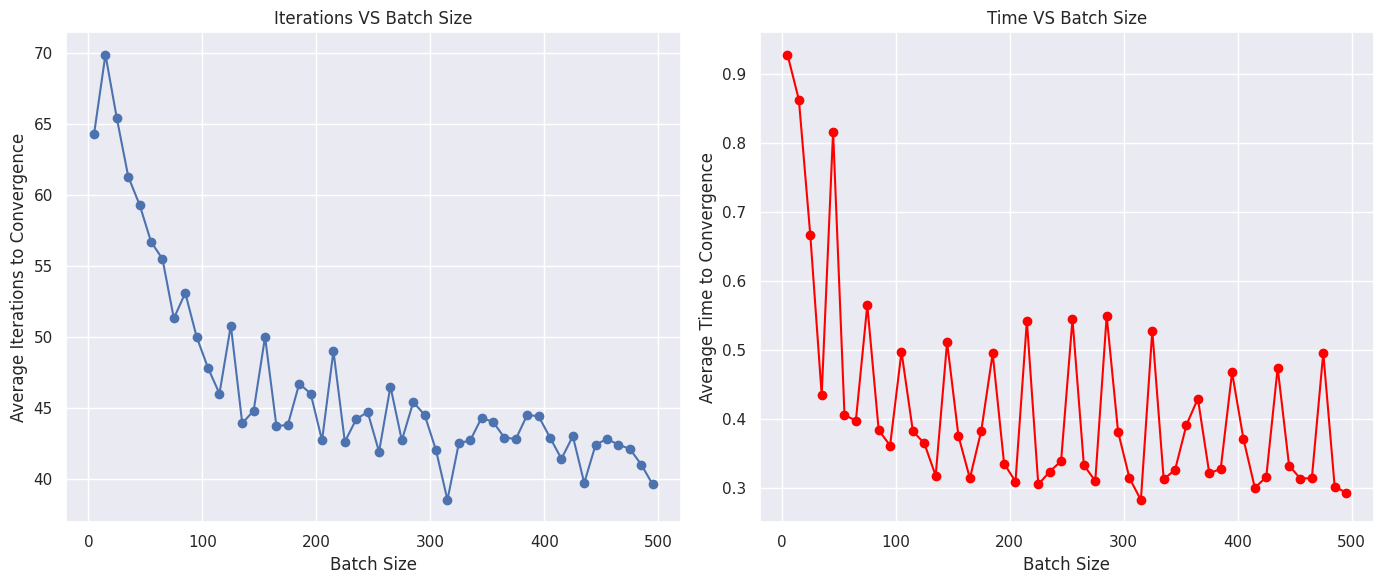

In [ ]:
import time
batch_sizes = np.arange(5, 500, 10)
k = 10
tolerance = 1e-4
max_iter = 300

avg_times = []
avg_iters = []

for batch_size in batch_sizes:
    times = []
    iters = []

    for _ in range(k):
        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': x.shape[1],
                'lambda_': 1e-1,
                'batch_size': batch_size
            }
        }

        model = LinearRegression(descent_config, tolerance=tolerance, max_iter=max_iter)
        start_time = time.time()
        model.fit(x, y)
        end_time = time.time()

        times.append(end_time - start_time)
        iters.append(len(model.loss_history) - 1)

    avg_times.append(np.mean(times))
    avg_iters.append(np.mean(iters))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(batch_sizes, avg_iters, marker='o')
plt.xlabel("Batch Size")
plt.ylabel("Average Iterations to Convergence")
plt.title("Iterations VS Batch Size")

plt.subplot(1, 2, 2)
plt.plot(batch_sizes, avg_times, marker='o', color='red')
plt.xlabel("Batch Size")
plt.ylabel("Average Time to Convergence")
plt.title("Time VS Batch Size")

plt.tight_layout()
plt.show()

Можно сделать вывод, что увеличение batch size приводят к меньшим затратам по времении и уменьшению итераций. Хотя в завсимости от лямбды у меня получались различные графики, но такая тенденция прослеживалась. Поэтому лучший batch size лучше устанавливать эксперементально, так как в зависимости от данных и параметров модели он будет разным.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/70588/run-report/124666695/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [ ]:
from sklearn.metrics import r2_score

lambda_grid = np.logspace(-3, 0, 5)
mu_grid = np.logspace(-5, -2, 5)
results_reg = {}
methods = ['full', 'stochastic', 'momentum', 'adam']

for method in methods:
    print(f"Метод: {method}")

    results_reg[method] = {
        'best_lambda': None,
        'best_mu': None,
        'best_r2': -np.inf,
        'train_errors': [],
        'val_errors': [],
        'iterations': [],
        'train_errors_iter': []
    }

    for lambda_ in lambda_grid:
        for mu in mu_grid:
            descent_config = {
                'descent_name': method,
                'regularized': True,
                'kwargs': {'dimension': x_train.shape[1], 'lambda_': lambda_, 'mu': mu}
            }

            model = LinearRegression(descent_config=descent_config)
            model.fit(x_train, y_train)

            y_train_pred = model.predict(x_train)
            y_val_pred = model.predict(x_val)

            if np.isnan(y_train_pred).any() or np.isinf(y_train_pred).any() or \
               np.isnan(y_val_pred).any() or np.isinf(y_val_pred).any():
                print(f"Пропуск для lambda={lambda_}, mu={mu} из-за NaN или inf")
                continue

            train_error = np.mean((y_train - y_train_pred) ** 2)
            val_error = np.mean((y_val - y_val_pred) ** 2)
            r2_val = r2_score(y_val, y_val_pred)

            results_reg[method]['train_errors'].append(train_error)
            results_reg[method]['val_errors'].append(val_error)
            results_reg[method]['iterations'].append(len(model.loss_history))
            results_reg[method]['train_errors_iter'].append(model.loss_history)

            if r2_val > results[method]['best_r2']:
                results_reg[method]['best_r2'] = r2_val
                results_reg[method]['best_lambda'] = lambda_
                results_reg[method]['best_mu'] = mu

    print(f"Лучшее значение lambda для {method}: {results_reg[method]['best_lambda']}")
    print(f"Лучшее значение mu для {method}: {results_reg[method]['best_mu']}")
    print(f"R2 на валидационной выборке для {method}: {results_reg[method]['best_r2']}")
    print("----")

Метод: full
Лучшее значение lambda для full: None
Лучшее значение mu для full: None
R2 на валидационной выборке для full: -inf
----
Метод: stochastic
Лучшее значение lambda для stochastic: 1.0
Лучшее значение mu для stochastic: 0.01
R2 на валидационной выборке для stochastic: 0.5952263461413111
----
Метод: momentum
Лучшее значение lambda для momentum: None
Лучшее значение mu для momentum: None
R2 на валидационной выборке для momentum: -inf
----
Метод: adam
Лучшее значение lambda для adam: None
Лучшее значение mu для adam: None
R2 на валидационной выборке для adam: -inf
----


У меня очень долго работает это задание, и как видно из вывода результатов, программа не находит параметры для определенных методов, хотя при других параметрах у меня получалось вывести для всех, но так как все работает очень долго, я уже не могу заново это перезапустить.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

Чтобы найти градиент, продифференцируем  $L(y, a)$  по  $a$ .

- Производная внешней функции  $\log(u$

Пусть  $u = \cosh(a - y)$ . Тогда:

$L(y, a) = \log(u)$.

Производная $\log(u)$  по  $u$  равна  $\frac{1}{u}$ :

$\frac{d}{da} \log(\cosh(a - y)) = \frac{1}{\cosh(a - y)} \cdot \frac{d}{da} \cosh(a - y)$.


- Производная функции  $\cosh(a - y)$

Теперь найдём производную  $\cosh(a - y)$  по  $a$ :

$\frac{d}{da} \cosh(a - y) = \sinh(a - y)$.


- Подставим результат

Таким образом, производная  $L(y, a)$  по  a  будет:

$\frac{dL(y, a)}{da} = \frac{\sinh(a - y)}{\cosh(a - y)}$.


- Упростим выражение

$\frac{dL(y, a)}{da} = \tanh(a - y)$.


Ответ

Градиент функции потерь Log-Cosh по  a  равен:

$\frac{dL(y, a)}{da} = \tanh(a - y)$.


Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

class BaseDescent:
    def calc_gradient(self, x: np.ndarray, y: np.ndarray, a: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return 2 * (a - y)
        elif self.loss_function is LossFunction.LogCosh:
            return np.tanh(a - y)
        elif self.loss_function is LossFunction.MAE:
            return np.sign(a - y)
        elif self.loss_function is LossFunction.Huber:
            delta = 1.0
            diff = a - y
            return np.where(np.abs(diff) <= delta, diff, delta * np.sign(diff))